In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()

In [3]:
# setosa is encoded as 0
# versicolor is encoded as 1
# virginica is encoded as 2
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris.data

In [5]:
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

# Visual EDA

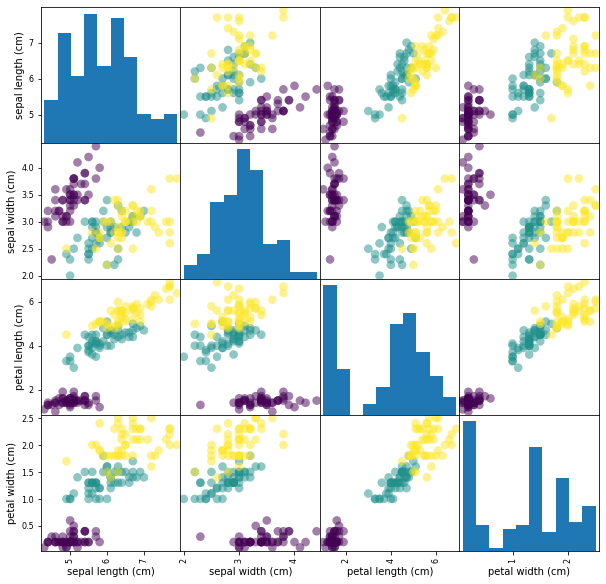

In [8]:
#Visual EDA (Exploratory Data Analysis)
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [10,10], s=75, marker = 'o')

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

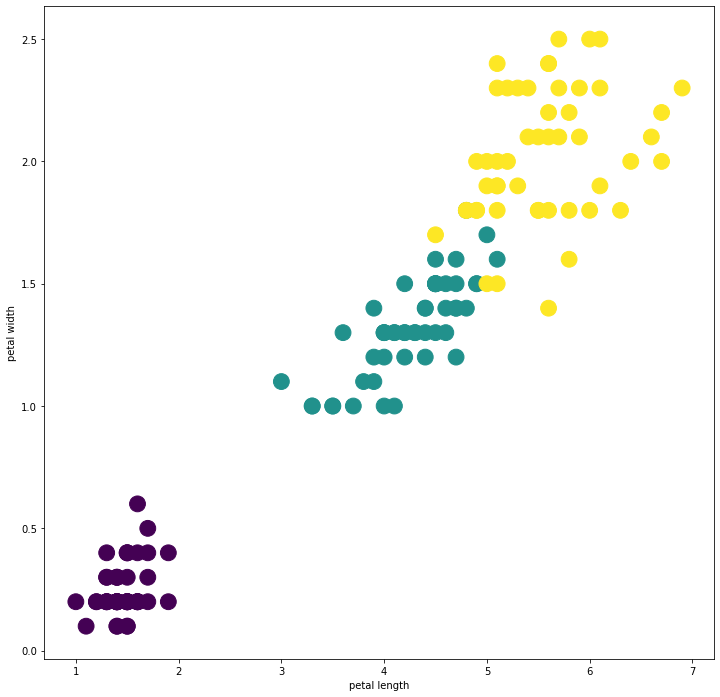

In [18]:
fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], s=250, c = y)
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

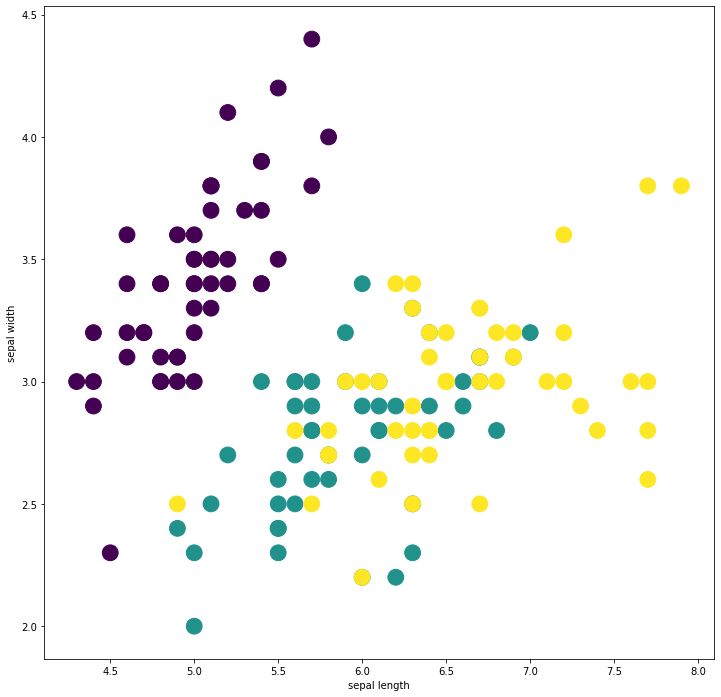

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=250, c = y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

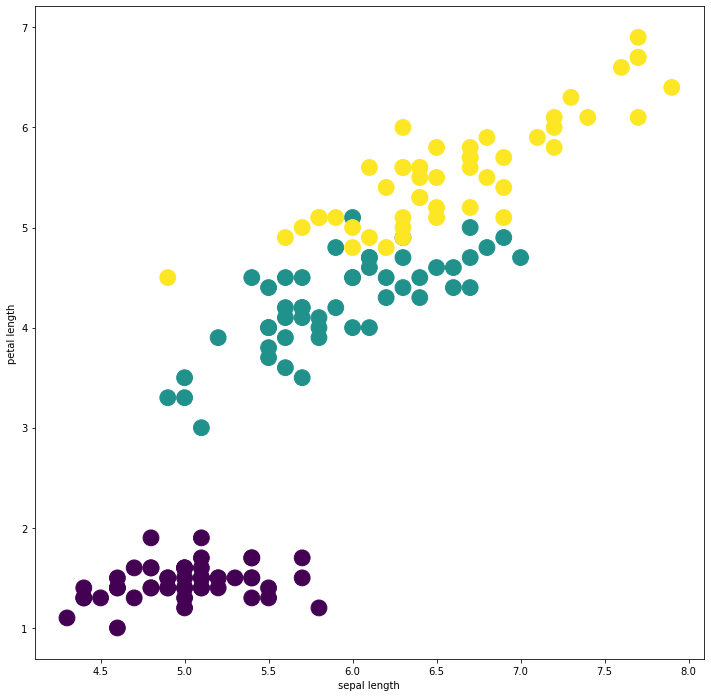

In [20]:
fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], s=250, c = y)
plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.show()

# Simple K Means Cluster Analysis

In [22]:
iris_2D = df[['sepal length (cm)', 'petal length (cm)']]

iris_2D.head()

sepal length (cm)  petal length (cm)
0                5.1                1.4
1                4.9                1.4
2                4.7                1.3
3                4.6                1.5
4                5.0                1.4

In [23]:
iris_2D = np.array(iris_2D)

In [25]:
model_2D_kmeans = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

In [26]:
model_2D_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [27]:
centroids_2D = model_2D_kmeans.cluster_centers_
centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49215686],
       [6.83902439, 5.67804878]])

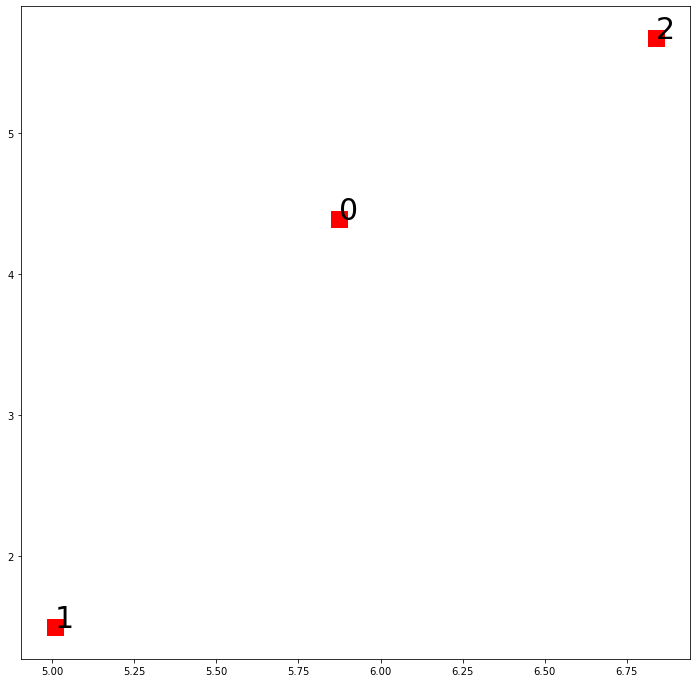

In [29]:
fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], s=250, c ='r', marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

plt.show()

In [32]:
print("Homogeneity Score: ", metrics.homogeneity_score(y, model_2D_kmeans.labels_))

print("Completeness Score: ", metrics.completeness_score(y, model_2D_kmeans.labels_))

print("V Measure Score: ", metrics.v_measure_score(y, model_2D_kmeans.labels_))

print("Adj Rand Score: ", metrics.adjusted_rand_score(y, model_2D_kmeans.labels_))

print("Adj Mutual Info Score: ", metrics.adjusted_mutual_info_score(y, model_2D_kmeans.labels_))

print("Silhouette Score: ", metrics.silhouette_score(iris_2D, model_2D_kmeans.labels_))

Homogeneity Score:  0.7033177646052958
Completeness Score:  0.7096993707802843
V Measure Score:  0.706494157075837
Adj Rand Score:  0.6988627672348092
Adj Mutual Info Score:  0.7028024531409135
Silhouette Score:  0.5890584158017611


# Multidimensional K Means Cluster Analysis

In [34]:
kmeans_model = KMeans(n_clusters=3).fit(df)

In [35]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [36]:
print("Homogeneity Score: ", metrics.homogeneity_score(y, kmeans_model.labels_))

print("Completeness Score: ", metrics.completeness_score(y, kmeans_model.labels_))

print("V Measure Score: ", metrics.v_measure_score(y, kmeans_model.labels_))

print("Adj Rand Score: ", metrics.adjusted_rand_score(y, kmeans_model.labels_))

print("Adj Mutual Info Score: ", metrics.adjusted_mutual_info_score(y, kmeans_model.labels_))

print("Silhouette Score: ", metrics.silhouette_score(df, kmeans_model.labels_))

Homogeneity Score:  0.7514854021988338
Completeness Score:  0.7649861514489815
V Measure Score:  0.7581756800057784
Adj Rand Score:  0.7302382722834697
Adj Mutual Info Score:  0.7551191675800485
Silhouette Score:  0.5528190123564091


# Performing Clustering Using Multiple Techniques
### - Centroid Based
    - K Means
    - Mini Batch K Means
### - Heirarchical
    -Agglomerative
    - BIRCH
### - Distribution Based
    
### - Density Based
    - DBSCAN
    - Mean Shift
    - Affinity Propagation
    
# Choosing the Right Algo
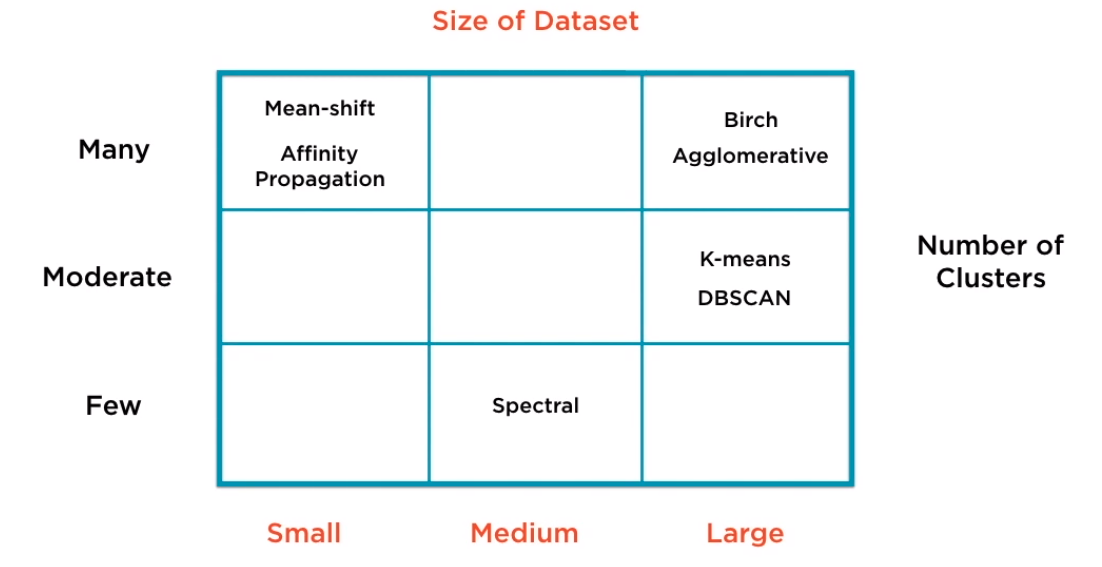

## Hierarchical
- BIRCH, Agglomerative
- Large Dataset, Large number of Clusters
- build a tree representation of the data
- each data point is a leaf that is merged into different numbers of clusters (branch)
- removes outliers
- works well for large datasets, large number of clusters
- can incrementally update clusters by processing incoming data (batch)
- Agglomerative works even in the absense of Euclidean distance (bottoms up approach)

- BIRCH doesn't scale to a large number of features

## Density Based
- Mean Shift, Affinity Propagation
- Small datasets, large number of clusters
- uneven cluster sizes, & manifold shapes (complex higher dimensional shapes (that are twisted, rolled, & turned)
- uses pairwise distances
- Affinity Prop uses graph distance

## Large Dataset, Moderate # of Clusters
- DBSCAN, KMeans
- kmeans delivers for even cluster sizes and flat surfaces
- mini batch is almost as good and performant
- DBSCAN delivers for uneven cluster sizes and manifolds

## Spectral
- Small to medium size dataset, few clusters
- graph distance
- even cluster sizes
- works well with manifold data

## What is the metric to determine nearness?

- Euclidean (L2) - $\sqrt{\sum dist^2}$

- Manhattan (L1) - $\sum abs(dist)$ aka taxi cab dist

- Cosine

- Precomputed

## How is nearness measured? How do we say that two clusters are near?

Linkage criterion determines the distance to be minimized when merging clusters
- single: min(dist) between all points in the two clusters
- complete: max(dist) between all points in the two clusters
- average: avg(dist)
- ward: min(var of the data points in the two clusters)



# Mini-Batch K Means Clustering

- performs K-means on randomly sampled subsets
- it is the same as K-Means
- reduces computations, faster processing


# Heirarchical Clustering
Points that are "close" are merged together. The distance for "close" is relaxed over each iteration as each data point is merged into fewer and fewer clusters.

Can be viewed in a dendrogram.

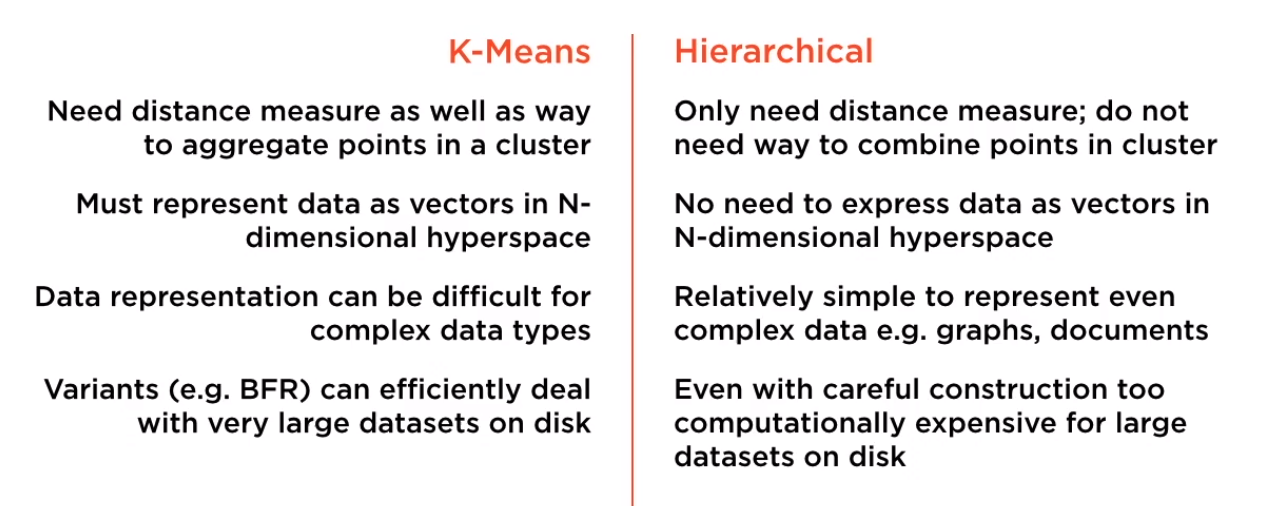

# DBSCAN
## Density Based Spatial Clustering of Applications with Noise

- Large Dataset, moderate cluster count.
- Density based approach that looks for high density areas of data points. 
- Effective for clusters of different sizes and manifold data.
- Points with few near neighbors are marked as outliers.
- Not as good as BIRCH at dealing with noise and outliers.

#### Params

**eps:** minimum distance, points closer than this are neighbors
- if too small, most of the data will not be clustered and considered outliers
- if too large, clustering will be too coarse

**min_samples:** min number of points to form a dense region
- should be greater than the number of dimensions in the data
- large values are better for noisy data points and will form significant clusters



# Mean Shift Clustering

- Small Datasets, many clusters
- Works well with uneven cluster sizes and manifold data


**STEPS**
1. Define a neighborhood for each point
2. Calculate a function (kernal) based on all points in the neighborhood
3. Using the RBF kernal we calculate the value for each point
    - high RBF values are considered peaks
    - low RBF values are considered troughs
4. Shift all points to the nearest peak
5. Recalculate and iterate.
6. The model converges when the points stop shifting. 
7. Each peak represents a cluster.

**Kernal Types**
- Flat (each point gets same weight)
- Gaussian RBF (probabilty wieghted sum of points)
    - mean: the center point
    - bandwith: ~ standard deviation. This is a hyperparameter
    
 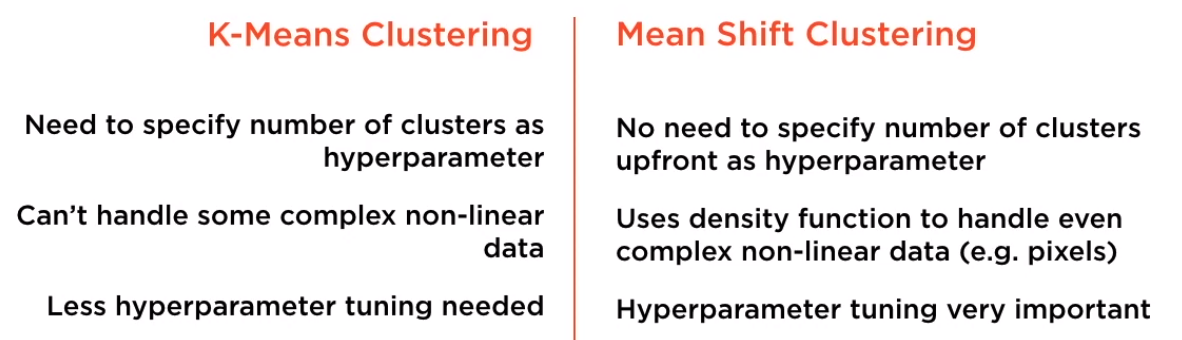
 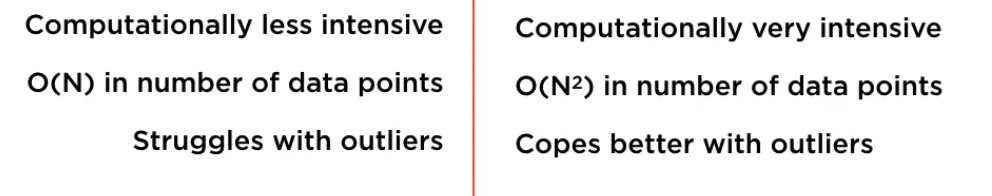

# BIRCH - Balanced Iterative Reducing and Clustering using Hierarchies

- Large dataset, many clusters
- Detects and removes outliers
- incremently processes incoming data points
- very memory and time efficient
- entire dataset need not be loaded into memory
- doesn't work with high dimensionality data

# Affinity Propagation

- Small Datasets, many clusters
- Works well with uneven cluster sizes and manifold data
- Does not require number of clusters to be specified

- Makes no assumptions about internal data of points
- Accepts graph distances (nearest neighbor graphs
- Attempts to find exemplars (points that are representative of the cluster)
- Data points are network notes which send messages to one another
- messages express the willingness of points to be exemplars

#### Params
**damping:** Extent to which the current value is maintained relative to the incoming value - a **learning rate** for the algorithm


# Spectral Clustering

- Small to Medium size datasets, few clusters
- simple to implement, intuitive results
- even cluster size
- Fine for Manifold data
- Accepts a precomputed similarity matrix as an input

- **works well with image segmentation algorithms**
- relies on distance between points
- Applies Eigenvalue (spectrum) decomposition
- dimensionality reduction is followed by pairwise similarity measurement
- DBSCAN is a special case of spectral clustering
- K-means kernal clustering is a special case of spectral clustering
    - First, applies kernal trick transform, then implements KMeans

In [126]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering

In [97]:
def build_model(clustering_model, data,labels):
    model = clustering_model(data)
    
    homo = metrics.homogeneity_score(labels, model.labels_)
    comp = metrics.completeness_score(labels, model.labels_)
    v_ms = metrics.v_measure_score(labels, model.labels_)
    rand = metrics.adjusted_rand_score(labels, model.labels_)
    mutl = metrics.adjusted_mutual_info_score(labels, model.labels_)
    sill = metrics.silhouette_score(data, model.labels_)
    scor = np.average([homo, comp, v_ms, rand, mutl, sill])
    stdv = np.std([homo, comp, v_ms, rand, mutl, sill])
    
    print('Homo\tCompl\tV-Meas\tARI\tAMI\tSill\tScore\tStDv')
    print(62 * '-')
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t'
         %(homo, comp, v_ms, rand, mutl, sill, scor, stdv))

In [98]:
def k_means_fn(data, n_clusters=3, max_iter=100):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [99]:
def agglomerative_fn(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    
    return model

In [102]:
def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    
    return model

In [104]:
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    
    return model

In [106]:
def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    
    return model

In [121]:
def affinity_propagation_fn(data, random_state=0,damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    
    return model

In [123]:
def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [100]:
#KMeans
build_model(k_means_fn, df, y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553	0.719	0.075	


In [125]:
# Mini Batch KMeans
build_model(mini_batch_kmeans_fn, df,y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.736	0.747	0.742	0.716	0.739	0.551	0.705	0.070	


In [101]:
#Agglomerative
build_model(agglomerative_fn, df, y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554	0.727	0.079	


In [103]:
#DBSCAN
build_model(dbscan_fn, df,y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372	0.541	0.082	


In [105]:
#Mean Shift
build_model(mean_shift_fn, df,y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551	0.726	0.079	


In [107]:
#BIRCH
build_model(birch_fn, df,y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.675	0.738	0.705	0.610	0.701	0.502	0.655	0.079	


In [122]:
# Affinity Propagation
build_model(affinity_propagation_fn, df,y)

Homo	Compl	V-Meas	ARI	AMI	Sill	Score	StDv
--------------------------------------------------------------
0.844	0.487	0.618	0.438	0.607	0.342	0.556	0.160	


/home/rho/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


In [128]:
# Spectral Clustering
# Rewatch the video, notes aren't useful. You have to re-watch the video.



# Sources

Ravi, J. (2019). Building Clustering Models with scikit-learn, video recording, Pluralsight. Available from https://app.pluralsight.com/library/courses/building-clustering-models-scikit-learn/table-of-contents

# Hyperparameter Tuning for Clustering Models


## Silhouette Score
- defines a coefficeint for each sample
- Captures how similar an object is to other objects in its own cluster
- Captures how different an object is from other objects outside its own cluster
- Bounded between +1(perfect) and -1 (really bad)
- Scores around 0 indicate that clusters are overlapping


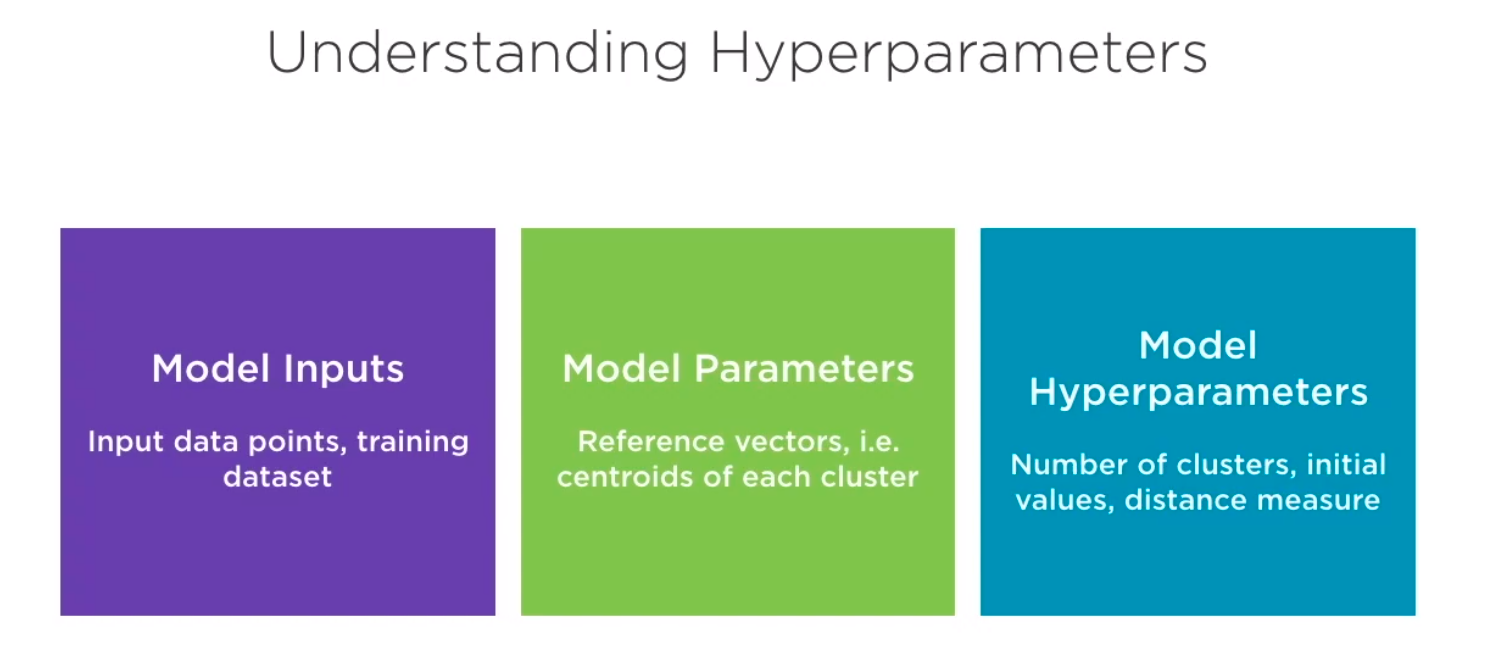

## Hyperparameters
- Number of clusters
- Seeds - initial values
- Distance measures

## n_clusters

**Elbow Method**
1. Pick a range of candidate values, e.g. 1 - 10
2. Calculate average distance from centroid for each value
3. Plot and find "elbow"
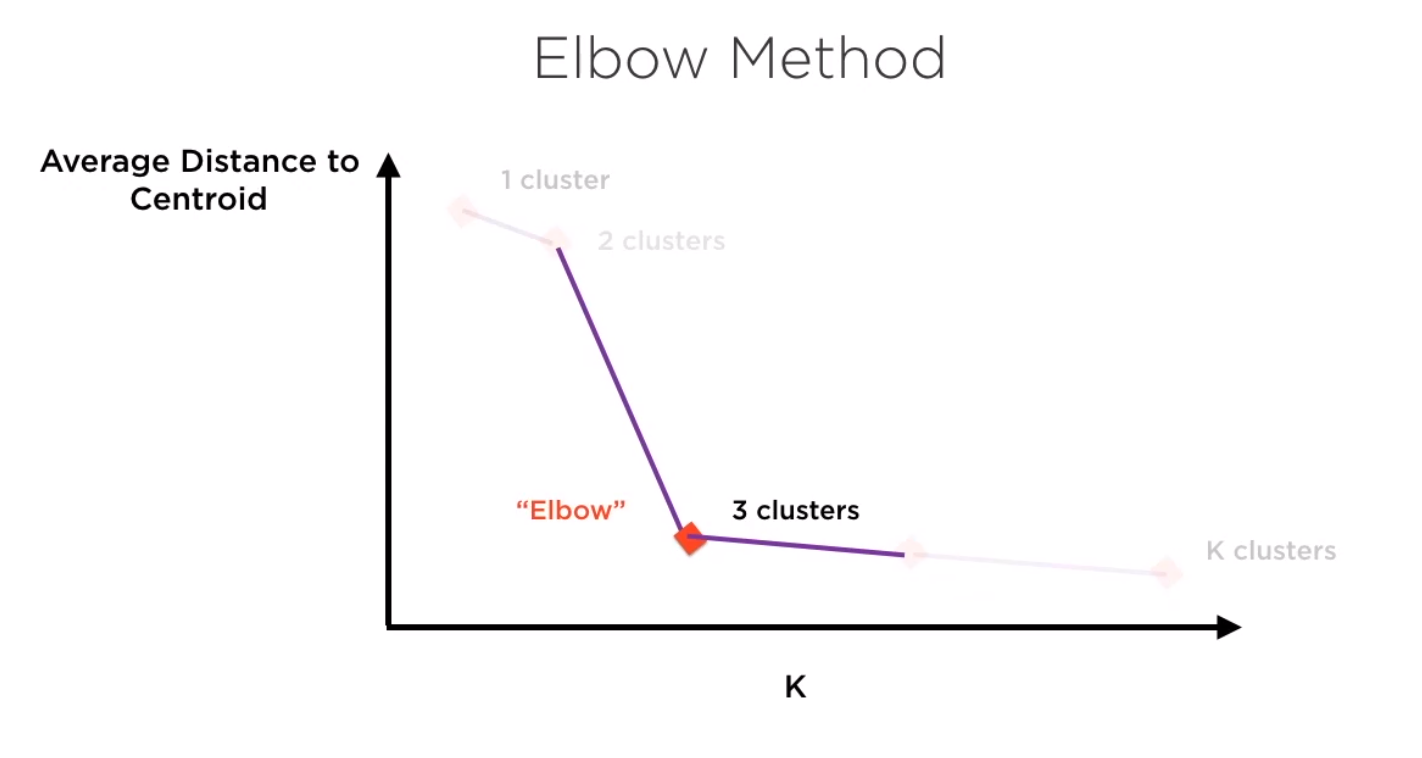

**Silhouette Method**
1. Pick a range of candidate values, e.g. 1 - 10
2. Calculate silhouettes for each
3. Pick that value of k that is closest to 1.

## Seeds

- Final reference vector values are sensative to initial values
- Random initialization might not work, examine your data

## Distance
- Euclidean
- Mahalanobis
- Cosine

In [129]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Tuning Kmeans

In [130]:
parameters = {'n_clusters':[2,3,4,5,10,20,30]}
parameter_grid = ParameterGrid(parameters)

In [131]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [132]:
best_score = -1
model = KMeans()

In [133]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(df)
    
    ss = metrics.silhouette_score(df, model.labels_)
    print('Parameter:', g, ' Score:', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter: {'n_clusters': 2}  Score: 0.681046169211746
Parameter: {'n_clusters': 3}  Score: 0.5528190123564091
Parameter: {'n_clusters': 4}  Score: 0.4980505049972867
Parameter: {'n_clusters': 5}  Score: 0.4887488870931048
Parameter: {'n_clusters': 10}  Score: 0.30022152126541185
Parameter: {'n_clusters': 20}  Score: 0.2827578995550645
Parameter: {'n_clusters': 30}  Score: 0.2642369668233204


In [134]:
display(best_grid)
display(best_score)

{'n_clusters': 2}

0.681046169211746

# Tuning DBSCAN

In [160]:
parameters = {'eps':[0.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1.0],
             'min_samples':[4,5,6,7,8,9,10,20,30]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.45, 'min_samples': 4},
 {'eps': 0.45, 'min_samples': 5},
 {'eps': 0.45, 'min_samples': 6},
 {'eps': 0.45, 'min_samples': 7},
 {'eps': 0.45, 'min_samples': 8},
 {'eps': 0.45, 'min_samples': 9},
 {'eps': 0.45, 'min_samples': 10},
 {'eps': 0.45, 'min_samples': 20},
 {'eps': 0.45, 'min_samples': 30},
 {'eps': 0.5, 'min_samples': 4},
 {'eps': 0.5, 'min_samples': 5},
 {'eps': 0.5, 'min_samples': 6},
 {'eps': 0.5, 'min_samples': 7},
 {'eps': 0.5, 'min_samples': 8},
 {'eps': 0.5, 'min_samples': 9},
 {'eps': 0.5, 'min_samples': 10},
 {'eps': 0.5, 'min_samples': 20},
 {'eps': 0.5, 'min_samples': 30},
 {'eps': 0.55, 'min_samples': 4},
 {'eps': 0.55, 'min_samples': 5},
 {'eps': 0.55, 'min_samples': 6},
 {'eps': 0.55, 'min_samples': 7},
 {'eps': 0.55, 'min_samples': 8},
 {'eps': 0.55, 'min_samples': 9},
 {'eps': 0.55, 'min_samples': 10},
 {'eps': 0.55, 'min_samples': 20},
 {'eps': 0.55, 'min_samples': 30},
 {'eps': 0.6, 'min_samples': 4},
 {'eps': 0.6, 'min_samples': 5},
 {'eps': 0.6, 'm

In [161]:
best_score = -1
model = DBSCAN()

In [162]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(df)
    
    ss = metrics.silhouette_score(df, model.labels_)
    print('Parameter:', g, ' Score:', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter: {'eps': 0.45, 'min_samples': 4}  Score: 0.3724439898969612
Parameter: {'eps': 0.45, 'min_samples': 5}  Score: 0.45979471570598984
Parameter: {'eps': 0.45, 'min_samples': 6}  Score: 0.43568418993699426
Parameter: {'eps': 0.45, 'min_samples': 7}  Score: 0.41567163045641603
Parameter: {'eps': 0.45, 'min_samples': 8}  Score: 0.38849819814209385
Parameter: {'eps': 0.45, 'min_samples': 9}  Score: 0.2099225838904565
Parameter: {'eps': 0.45, 'min_samples': 10}  Score: 0.177373952317289
Parameter: {'eps': 0.45, 'min_samples': 20}  Score: 0.542496941393864
Parameter: {'eps': 0.45, 'min_samples': 30}  Score: 0.4020311977532077
Parameter: {'eps': 0.5, 'min_samples': 4}  Score: 0.38124539908253136
Parameter: {'eps': 0.5, 'min_samples': 5}  Score: 0.48603419703456835
Parameter: {'eps': 0.5, 'min_samples': 6}  Score: 0.47716305931576813
Parameter: {'eps': 0.5, 'min_samples': 7}  Score: 0.46426680861524733
Parameter: {'eps': 0.5, 'min_samples': 8}  Score: 0.4503472229298228
Parameter: {'eps

In [163]:
display(best_grid)
display(best_score)

{'eps': 0.9, 'min_samples': 4}

0.6867350732769776

In [164]:
model.set_params(**best_grid)
model.fit(df)

DBSCAN(eps=0.9, min_samples=4)

In [167]:
# find # of clusters
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [168]:
# noisy data
n_noise = list(model.labels_).count(-1)
n_noise

0

# Tuning Mean Shift

In [169]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(df)

1.2020768127998687

In [170]:
model = MeanShift(bandwidth=estimate_bandwidth(df)).fit(df)
score = metrics.silhouette_score(df, model.labels_)
score

0.685788171261719

# Feature Selection & Tuning

What features contribute to meaningful cluster analysis. Unlike OLS and logit models, the kitchen sink approach is futile and fruitless. 

K-means clustering should not be done with data of mixed types. K-means is essentially a simple search algorithm to find a partition that minimizes the within-cluster squared Euclidean distances between the clustered observations and the cluster centroid, it should only be used with data where squared Euclidean distances would be meaningful. The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on such a space isn't really meaningful.

**But what if my categorical data is ordered?**

In order to make k-means possible on an ordinal dataset, we’re going to define a mapping from our ordinal data into numerical values. Essentially, we assign weights to each factor level, and use those weights to perform our analysis.

(Reminder: this is a bad idea if your categorical data has no natural ordering. We’re basically creating the concepts of order and magnitude and forcing them upon our dataset. If this doesn’t make sense for your data, you may be interested in k-modes clustering.)

Features are generally going to fall into one of three buckets: continous, bivariate (dummy), and ordinal. Categorical data will consist of the last two.
- continous data that is parametric can be normalized.
- continous non-parametric data can be min-max scaled between (0,1).
- Log Transform can be applied to data that conforms to a power law
- QuantileTransformer can be used for an uncategorizable distribution

## Sources
https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data

https://towardsdatascience.com/k-means-clustering-on-ordinal-data-7222b5ee1693

https://developers.google.com/machine-learning/clustering/prepare-data